In [256]:
import pandas as pd

# Data Loading and Cleaning

In [228]:
df = pd.read_csv('C:/Users/arbru/OneDrive/Desktop/RAI/Artif-I/backend/datasets/expense_data_1.csv')
print(df.info(), "\n Desc. stats \n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB
None 
 Desc. stats 
        Subcategory           INR  Note.1        Amount     Account.1
count          0.0    277.000000     0.0    277.000000    277.000000
mean           NaN    410.750903     NaN    406.759134    406.759134
std            NaN   1065.756

In [229]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [218]:
df.drop(columns=['Subcategory', 'INR','Note', 'Note.1', 'Account.1'], inplace=True)
df.head()

,Date,Account,Category,Income/Expense,Amount,Currency
0,3/2/2022 10:11,CUB - online payment,Food,Expense,50.0,INR
1,3/2/2022 10:11,CUB - online payment,Other,Expense,300.0,INR
2,3/1/2022 19:50,CUB - online payment,Food,Expense,78.0,INR
3,3/1/2022 18:56,CUB - online payment,Transportation,Expense,30.0,INR
4,3/1/2022 18:22,CUB - online payment,Food,Expense,67.0,INR


In [219]:
df['Amount'] = (df['Amount'] / 10).round(2)
df.columns = [col.lower() for col in df.columns]
df['currency'] = df['currency'].replace('INR', 'EUR')
df.head(3)

,date,account,category,income/expense,amount,currency
0,3/2/2022 10:11,CUB - online payment,Food,Expense,5.0,EUR
1,3/2/2022 10:11,CUB - online payment,Other,Expense,30.0,EUR
2,3/1/2022 19:50,CUB - online payment,Food,Expense,7.8,EUR


In [220]:
df = df[df['income/expense'].str.lower() == 'expense']
df.rename(columns={'income/expense': 'expenses', 'account':'payment_method'}, inplace=True)
df['category'] = [row.lower() for row in df['category']]
df['expenses'] = [row.lower() for row in df['expenses']]
df['payment_method'] = ["_".join(row.split()[2:]) for row in df['payment_method']]
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'] + pd.DateOffset(years=3)
df.head(3)


,date,payment_method,category,expenses,amount,currency
0,2025-03-02 10:11:00,online_payment,food,expense,5.0,EUR
1,2025-03-02 10:11:00,online_payment,other,expense,30.0,EUR
2,2025-03-01 19:50:00,online_payment,food,expense,7.8,EUR


In [221]:
df.to_csv('C:/Users/arbru/OneDrive/Desktop/RAI/Artif-I/backend/datasets/cleaned_expense_data.csv', index=False)

In [266]:
df_e = pd.read_excel('C:\\Users\\arbru\\OneDrive\\Desktop\\RAI\\Artif-I\\backend\\datasets\\raw\\expenses.xlsx')
df_e

,Date,Expenses,Category,Amount,Municipality,Province,Region,ID
0,2020-01-15,Transportation,Survival,41.00,Quezon City,Metro Manila,National Capital Region,E2020-1
1,2020-01-15,Transportation,Survival,40.00,Quezon City,Metro Manila,National Capital Region,E2020-2
2,2020-01-16,Food/Drinks,Optional,35.00,Quezon City,Metro Manila,National Capital Region,E2020-3
3,2020-01-16,Eating/Going Out,Optional,139.00,Quezon City,Metro Manila,National Capital Region,E2020-4
4,2020-01-16,Transportation,Survival,40.00,Quezon City,Metro Manila,National Capital Region,E2020-5
...,...,...,...,...,...,...,...,...
1180,2022-08-30,Eating/Going Out,Optional,3000.00,Pilar,Capiz,Western Visayas,E2022-163
1181,2022-08-31,Credit Card Payment,Obligation,1193.59,Pontevedra,Capiz,Western Visayas,E2022-164
1182,2022-08-31,Credit Card Payment,Obligation,1863.00,Makati City,Metro Manila,National Capital Region,E2022-165
1183,2022-08-31,Home,Obligation,3000.00,Pontevedra,Capiz,Western Visayas,E2022-166


In [267]:
df_e.drop(columns=['Category', 'Municipality', 'Province', 'Region', 'ID'], inplace=True)

In [269]:
df_e['currency'] = 'EUR'

In [271]:
df_e['Expenses'].value_counts()

Food/Drinks                        247
Transportation                     206
Phone/Internet                     150
Grocery                            144
Home                                96
Debt repayment                      78
Bank fees                           46
Electricity/Water                   40
Eating/Going Out                    30
Garbage                             25
Apartment                           23
Others                              21
Pension Fund                        18
Clothing/Shoes/Personal Items       16
Hair Cut                             8
Entertainment/Subscriptions          7
Magazines/Newspapers/Books           6
Personal care items (drugstore)      6
Health Insurance                     6
Healthcare                           3
Credit Card Payment                  3
Cable                                2
SSS                                  2
PhilHealth                           1
Revi Credit                          1
Name: Expenses, dtype: in

In [ ]:
df_e['Expenses'] = df_e['Expenses'].apply(lambda x: x.split("/")[0] if '/' in x else x)

In [303]:
df_e['payment_method'] = 'online_payment'

In [306]:
df_e.columns = [col.lower() for col in df_e.columns]
df_e

,date,expenses,amount,currency,payment_method
0,2020-01-15,Transportation,41.00,EUR,online_payment
1,2020-01-15,Transportation,40.00,EUR,online_payment
2,2020-01-16,Food,35.00,EUR,online_payment
3,2020-01-16,Eating,139.00,EUR,online_payment
4,2020-01-16,Transportation,40.00,EUR,online_payment
...,...,...,...,...,...
1180,2022-08-30,Eating,3000.00,EUR,online_payment
1181,2022-08-31,Credit Card Payment,1193.59,EUR,online_payment
1182,2022-08-31,Credit Card Payment,1863.00,EUR,online_payment
1183,2022-08-31,Home,3000.00,EUR,online_payment


In [ ]:
label_counts = df_e['expenses'].value_counts()
labels_to_replace = label_counts[label_counts < 30].index
df_e['expenses'] = df_e['expenses'].apply(lambda x: 'Others' if x in labels_to_replace else x)


In [314]:
df_e['expenses'].value_counts()

Food              247
Transportation    206
Phone             150
Others            148
Grocery           144
Home               96
Debt repayment     78
Bank fees          46
Electricity        40
Eating             30
Name: expenses, dtype: int64

In [341]:
df_e.rename(columns={'expenses': 'category'}, inplace=True)

In [317]:
df_e['date'] = pd.to_datetime(df_e['date'])
df_e['date'] = df_e['date'] + pd.DateOffset(years=1)

In [353]:
df_e['expenses'] = 'expense'
df_e = df_e[['date', 'payment_method', 'category', 'expenses', 'amount', 'currency']]


In [354]:
df_e.to_csv('C:\\Users\\arbru\\OneDrive\\Desktop\\RAI\\Artif-I\\backend\\datasets\\final\\expenses_2.csv', index=False)

## Merging the two datasets

In [424]:
df_1 = pd.read_csv('C:/Users/arbru/OneDrive/Desktop/RAI/Artif-I/backend/datasets/final/cleaned_expense_data.csv')
df_2 = pd.read_csv('C:\\Users\\arbru\\OneDrive\\Desktop\\RAI\\Artif-I\\backend\\datasets\\final\\expenses_2.csv')
df_3 = pd.concat([df_1, df_2], ignore_index=True)

In [425]:
df_1

,date,payment_method,category,expenses,amount,currency
0,2025-03-02 10:11:00,online_payment,food,expense,5.0,EUR
1,2025-03-02 10:11:00,online_payment,other,expense,30.0,EUR
2,2025-03-01 19:50:00,online_payment,food,expense,7.8,EUR
3,2025-03-01 18:56:00,online_payment,transportation,expense,3.0,EUR
4,2025-03-01 18:22:00,online_payment,food,expense,6.7,EUR
...,...,...,...,...,...,...
226,2024-11-23 22:53:00,online_payment,food,expense,17.9,EUR
227,2024-11-22 14:16:00,online_payment,food,expense,9.0,EUR
228,2024-11-22 14:16:00,online_payment,food,expense,9.7,EUR
229,2024-11-21 17:07:00,online_payment,transportation,expense,13.0,EUR


In [426]:
df_2['amount'] = (df_2['amount'] / 10).round(2)

In [427]:
df_2

,date,payment_method,category,expenses,amount,currency
0,2021-01-15,online_payment,Transportation,expense,4.10,EUR
1,2021-01-15,online_payment,Transportation,expense,4.00,EUR
2,2021-01-16,online_payment,Food,expense,3.50,EUR
3,2021-01-16,online_payment,Eating,expense,13.90,EUR
4,2021-01-16,online_payment,Transportation,expense,4.00,EUR
...,...,...,...,...,...,...
1180,2023-08-30,online_payment,Eating,expense,300.00,EUR
1181,2023-08-31,online_payment,Others,expense,119.36,EUR
1182,2023-08-31,online_payment,Others,expense,186.30,EUR
1183,2023-08-31,online_payment,Home,expense,300.00,EUR


In [428]:
df_3['category'] = [row.lower() for row in df_3['category']]
df_3['date'] = pd.to_datetime(df_3['date'])
df_3['date'] = df_3['date'].dt.date
df_3 = df_3.sort_values('date')

In [429]:
label_counts = df_3['category'].value_counts()
labels_to_replace = label_counts[label_counts < 30].index
df_3['category'] = df_3['category'].apply(lambda x: 'others' if x in labels_to_replace else x)

In [432]:
df_3.to_csv('C:\\Users\\arbru\\OneDrive\\Desktop\\RAI\\Artif-I\\backend\\datasets\\final\\final_expenses_dataset.csv', index=False)

## Forecasting model

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [441]:
df = pd.read_csv('C:\\Users\\arbru\\OneDrive\\Desktop\\RAI\\Artif-I\\backend\\datasets\\final\\final_expenses_dataset.csv')

In [442]:
df['category'].value_counts()

food              403
transportation    237
others            192
phone             150
grocery           144
home               96
debt repayment     78
bank fees          46
electricity        40
eating             30
Name: category, dtype: int64

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1416 non-null   object 
 1   payment_method  1415 non-null   object 
 2   category        1416 non-null   object 
 3   expenses        1416 non-null   object 
 4   amount          1416 non-null   float64
 5   currency        1416 non-null   object 
dtypes: float64(1), object(5)
memory usage: 66.5+ KB


<AxesSubplot:title={'center':'Time Series'}>

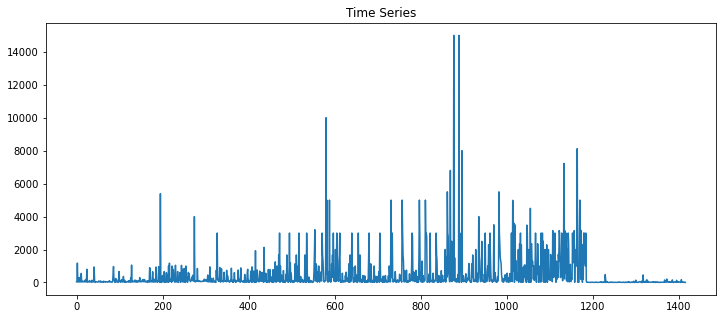

In [444]:
df['amount'].plot(figsize=(12, 5), title='Time Series')


In [445]:
df['date'] = pd.to_datetime(df['date'])
monthly_expenses = df.resample('M', on='date')['amount'].sum()

In [446]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['amount'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -3.7402526479060443
p-value: 0.0035812998749787913


ADF Statistic = -3.74

p-value = 0.00358

This indicates your original data is not stationary, but becomes stationary after differencing once.

In [454]:
model = ARIMA(monthly_expenses, order=(1,1,1))
results = model.fit()

forecast = results.forecast(steps=6)
print(forecast.round(2))

2025-04-30    1041.34
2025-05-31     619.52
2025-06-30     799.46
2025-07-31     722.70
2025-08-31     755.45
2025-09-30     741.48
Freq: M, Name: predicted_mean, dtype: float64
